# Proyek IMDB Movie Review Ratings

# Data Diri Peserta Dicoding

### Nama : 
Federick Dedi Samuel
### Nomor Register :
1494037162101-2556
### E-mail:
efederik36@gmail.com

# Codelab

In [ ]:
!pip install Kaggle
!mkdir ~/.kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d renanmav/imdb-movie-review-dataset

 35% 9.00M/25.7M [00:00<00:00, 22.6MB/s]
100% 25.7M/25.7M [00:00<00:00, 57.1MB/s]


In [ ]:
import zipfile, os

local_zip = '/content/imdb-movie-review-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/imdb-movie-review-dataset')
zip_ref.close()

In [ ]:
import pandas as pd
df = pd.read_csv('/content/imdb-movie-review-dataset/movie_data.csv')

In [ ]:
df.head()

,review,sentiment
0,This movie is just crap. Even though the direc...,0
1,Another detailed work on the subject by Dr Dwi...,1
2,THE CAT O'NINE TAILS (Il Gatto a Nove Code) <b...,0
3,"Like with any movie genre, there are good gang...",0
4,I watched it with my mom and we were like...<b...,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49969 entries, 0 to 49968
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49969 non-null  object
 1   sentiment  49969 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 780.9+ KB


In [ ]:
df['review'] = df['review'].str.lower()

In [ ]:
df.head()

,review,sentiment
0,this movie is just crap. even though the direc...,0
1,another detailed work on the subject by dr dwi...,1
2,the cat o'nine tails (il gatto a nove code) <b...,0
3,"like with any movie genre, there are good gang...",0
4,i watched it with my mom and we were like...<b...,0


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_word = set(stopwords.words('english'))
df['review'] = df['review'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop_word)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
df['review']

0        movie crap. even though directors claim part o...
1        another detailed work subject dr dwivedi takes...
2        cat o'nine tails (il gatto nove code) <br /><b...
3        like movie genre, good gangster movies bad gan...
4        watched mom like...<br /><br />what hell? get ...
                               ...                        
49964    movie terrible. brain surfin dude inherits com...
49965    well, fun... except fun part.<br /><br />it's ...
49966    time film released seen chorus line stage 4 ti...
49967    well, like pop/punk, punk, ska, tad bit modern...
49968    movie faithful burroughs' vision, excellent; d...
Name: review, Length: 49969, dtype: object

In [ ]:
ulasan = df['review'].values
label = df['sentiment'].values

In [ ]:
ulasan

array(['movie crap. even though directors claim part oi-culture, still very, bad directorial debut. topic interesting accept bad acting due fact, amateurs never acted before, worst thing film dialogs unexperienced naive directing. there\'s timing movie. felt like directors exited movie (it\'s first feature), actually never really asked themselves, story wanna tell. met ben (one directors) several occasions he\'s nice thoughtful guy, make director. think, "american history x" full clichã©s, somehow manages transport story. "oi!warning" full clichã©s, tell anything new provocative (-that\'s sad thing movie) far oi!-reality.<br /><br />if wanna see weird great german films, watch movies michael haneke, christoph schlingensief, oskar roehler, hans weingartner oliver hirschbiegel:<br /><br />benny\'s video funny games die unberã¼hrbare mein letzter film das experiment das weisse rauschen muxmã¤uschenstill ...<br /><br />*** ten, topic photography',
       'another detailed work subject dr d

In [ ]:
label

array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(ulasan, label, test_size=0.2)

In [ ]:
len(x_train)

39975

In [ ]:
len(x_test)

9994

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = 5000, oov_token = '<OOV>', filters='#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(x_train)             

In [ ]:
word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, 'br': 2, 'movie': 3, 'film': 4, 'one': 5, 'like': 6, 'good': 7, 'it': 8, 'even': 9, 'time': 10, 'would': 11, 'really': 12, 'story': 13, 'see': 14, 'the': 15, 'well': 16, 'much': 17, 'get': 18, 'bad': 19, 'also': 20, 'great': 21, 'people': 22, 'first': 23, 'made': 24, 'make': 25, 'way': 26, 'could': 27, 'movies': 28, 'think': 29, 'characters': 30, 'watch': 31, 'films': 32, 'two': 33, 'many': 34, 'character': 35, 'seen': 36, 'never': 37, 'acting': 38, 'plot': 39, 'love': 40, 'best': 41, 'life': 42, 'i': 43, 'little': 44, 'know': 45, 'show': 46, 'this': 47, 'ever': 48, 'better': 49, 'still': 50, 'end': 51, '"': 52, 'say': 53, 'and': 54, 'scene': 55, 'man': 56, 'scenes': 57, 'something': 58, 'go': 59, 'back': 60, 'real': 61, "i'm": 62, 'watching': 63, 'actors': 64, 'thing': 65, 'though': 66, 'years': 67, 'another': 68, 'funny': 69, 'work': 70, 'actually': 71, 'old': 72, '10': 73, 'makes': 74, 'director': 75, 'nothing': 76, 'find': 77, 'going': 78, 'look': 79, 'lot': 80, 'all':

In [ ]:
sequence_train = tokenizer.texts_to_sequences(x_train)
sequence_test = tokenizer.texts_to_sequences(x_test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_train = pad_sequences(sequence_train,
                             padding='post',
                             maxlen=100,
                             truncating='post')

padded_test = pad_sequences(sequence_test,
                            padding='post',
                            maxlen=100,
                            truncating='post')

In [ ]:
print(padded_train)

[[  77 1664   44 ... 1804  829  903]
 [  40  393 1110 ...    0    0    0]
 [4461 1294   24 ...    0    0    0]
 ...
 [ 443   63    4 ...    0    0    0]
 [ 118   23    1 ...    0    0    0]
 [ 351    6  204 ...    0    0    0]]


In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=64, input_length=100),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           320000    
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 369,665
Trainable params: 369,665
Non-trai

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98 and logs.get('val_accuracy')>0.98):
      print("\n Model telah mencapai akurasi >98% dan validasi akurasi >0.98%")
      self.model.stop_training = True

callback_model = myCallback()

In [ ]:
riwayat_training_model = model.fit(padded_train, y_train,
                                   epochs = 10,
                                   validation_data = (padded_test, y_test),
                                   callbacks=[callback_model],
                                   verbose=2)

Epoch 1/10
1250/1250 - 22s - loss: 0.6002 - accuracy: 0.6729 - val_loss: 0.5996 - val_accuracy: 0.7064 - 22s/epoch - 17ms/step
Epoch 2/10
1250/1250 - 10s - loss: 0.5878 - accuracy: 0.6733 - val_loss: 0.4576 - val_accuracy: 0.8035 - 10s/epoch - 8ms/step
Epoch 3/10
1250/1250 - 10s - loss: 0.3674 - accuracy: 0.8423 - val_loss: 0.3423 - val_accuracy: 0.8522 - 10s/epoch - 8ms/step
Epoch 4/10
1250/1250 - 10s - loss: 0.2992 - accuracy: 0.8781 - val_loss: 0.3342 - val_accuracy: 0.8510 - 10s/epoch - 8ms/step
Epoch 5/10
1250/1250 - 10s - loss: 0.2719 - accuracy: 0.8899 - val_loss: 0.3386 - val_accuracy: 0.8647 - 10s/epoch - 8ms/step
Epoch 6/10
1250/1250 - 10s - loss: 0.2473 - accuracy: 0.9025 - val_loss: 0.3211 - val_accuracy: 0.8690 - 10s/epoch - 8ms/step
Epoch 7/10
1250/1250 - 10s - loss: 0.2151 - accuracy: 0.9172 - val_loss: 0.3440 - val_accuracy: 0.8502 - 10s/epoch - 8ms/step
Epoch 8/10
1250/1250 - 11s - loss: 0.1830 - accuracy: 0.9299 - val_loss: 0.4041 - val_accuracy: 0.8599 - 11s/epoch - 

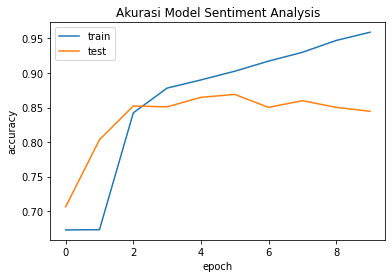

In [ ]:
import matplotlib.pyplot as plt
plt.plot(riwayat_training_model.history['accuracy'])
plt.plot(riwayat_training_model.history['val_accuracy'])
plt.title('Akurasi Model Sentiment Analysis')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

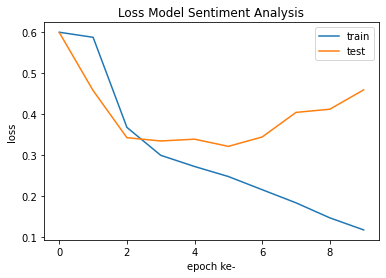

In [ ]:
import matplotlib.pyplot as plt
plt.plot(riwayat_training_model.history['loss'])
plt.plot(riwayat_training_model.history['val_loss'])
plt.title('Loss Model Sentiment Analysis')
plt.ylabel('loss')
plt.xlabel('epoch ke-')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()